In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = pd.read_csv("carprice.csv")
df = pd.DataFrame(cars)

In [7]:
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.drop(["car_ID", "symboling"], axis = 1, inplace = True)

In [11]:
df["company_name"] = df["CarName"].apply(lambda x:x.split(" ")[0])
df.drop(["CarName"], axis = 1, inplace = True)

In [12]:
df.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero


In [13]:
df["company_name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
df["company_name"] = df["company_name"].replace({"maxda":"mazda", "Nissan":"nissan", "porcshce": 'porsche', "toyouta": "toyota",
                                                 "vokswagen": "volkswagen", "vw": "volkswagen"})

In [19]:
print(df["company_name"].unique())
print(df["company_name"].value_counts())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: company_name, dtype: int64


In [21]:
df.duplicated().sum()

0

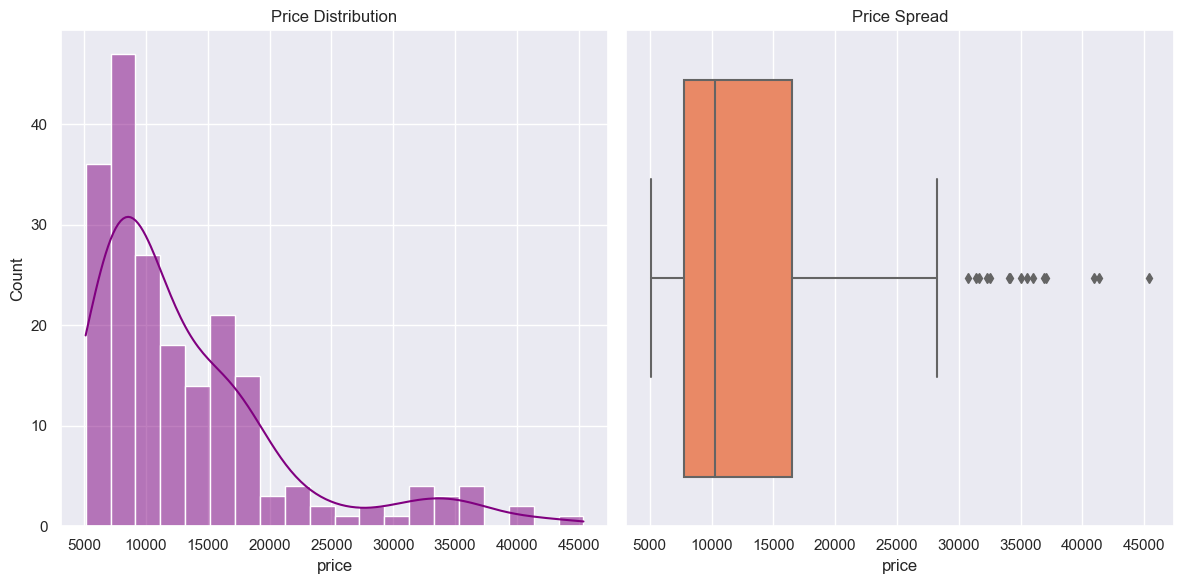

In [28]:
sns.set(style = "darkgrid")
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))

sns.histplot(df["price"], color="purple", kde = True, bins=20, ax=axis[0])
axis[0].set_title("Price Distribution")

sns.boxplot(x = "price", data = df, color="coral", ax=axis[1])
axis[1].set_title("Price Spread")

plt.tight_layout()
plt.show()

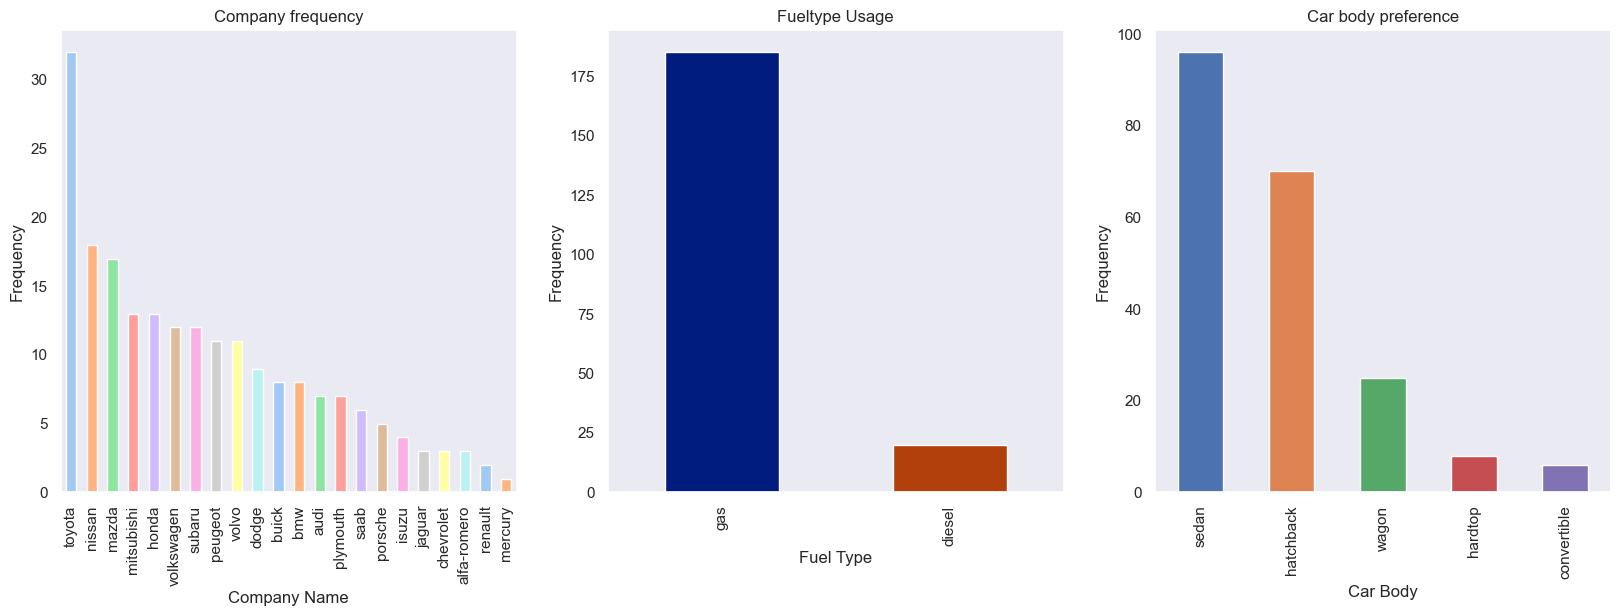

In [51]:
plt.figure(figsize=(20, 6))
sns.set(style="dark")

# Plot 1
plt.subplot(1, 3, 1)
colors = sns.color_palette("pastel")
plot = df["company_name"].value_counts().plot(kind="bar", color=colors)
plt.title("Company frequency")
plot.set(xlabel="Company Name", ylabel="Frequency")

# Plot 2
plt.subplot(1, 3, 2)
colors = sns.color_palette("dark")
plot = df["fueltype"].value_counts().plot(kind="bar", color=colors)
plt.title("Fueltype Usage")
plot.set(xlabel="Fuel Type", ylabel="Frequency")

# Plot 3
plt.subplot(1, 3, 3)
colors = sns.color_palette("deep")
plot = df["carbody"].value_counts().plot(kind="bar", color=colors)
plt.title("Car body preference")
plot.set(xlabel="Car Body", ylabel="Frequency")

plt.show()

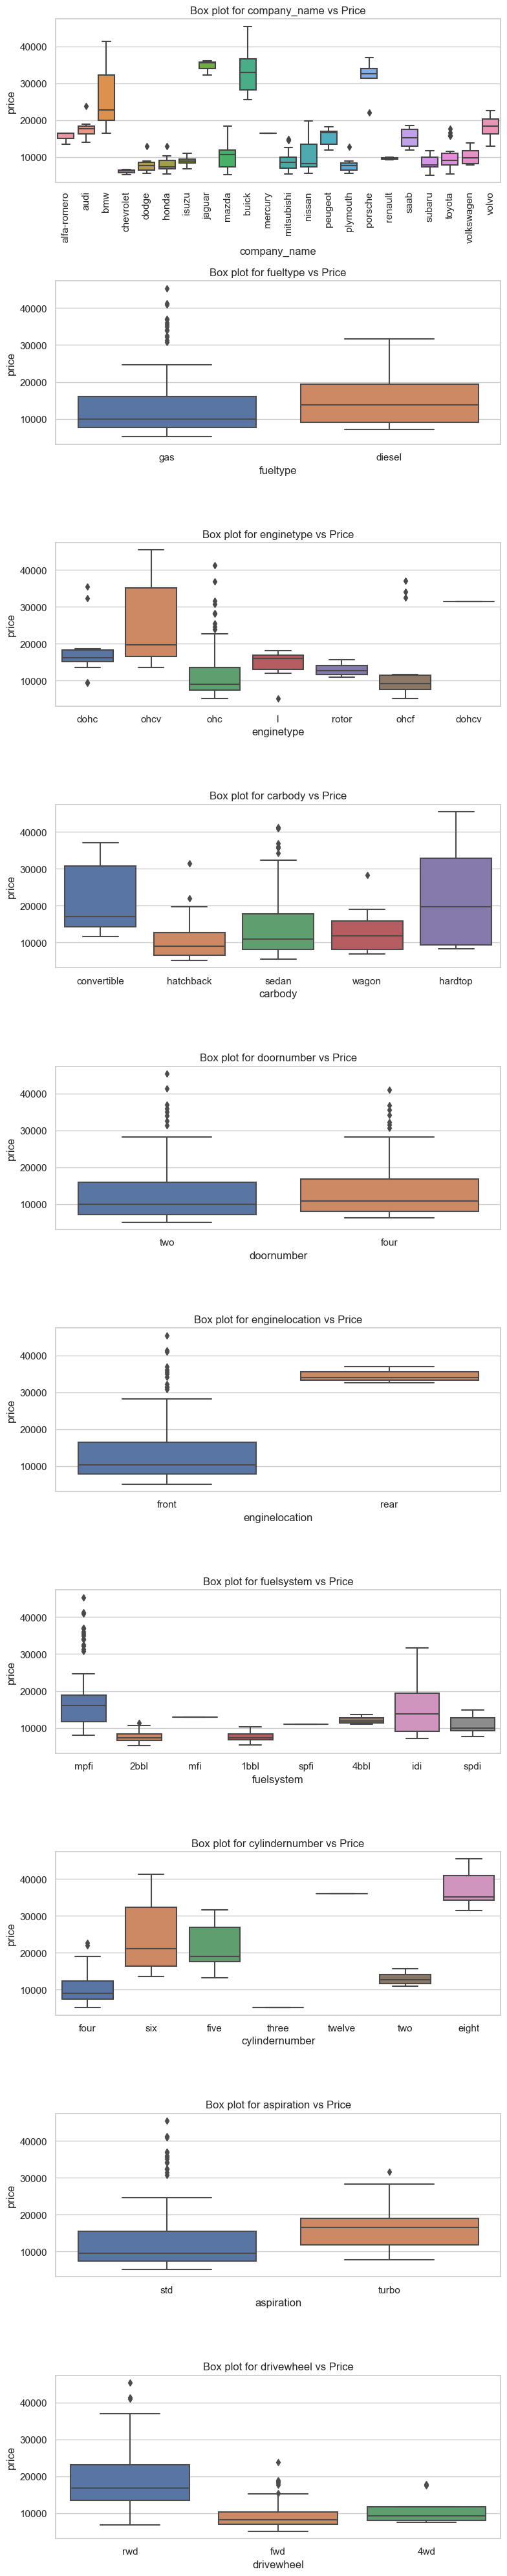

In [54]:
sns.set(style="whitegrid")

categorical_variables = ['company_name', 'fueltype', 'enginetype', 'carbody',
                          'doornumber', 'enginelocation', 'fuelsystem', 'cylindernumber',
                          'aspiration', 'drivewheel']

fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(8, 4* len(categorical_variables)))

for i, variable in enumerate(categorical_variables):
    sns.boxplot(x=variable, y='price', data=df, ax=axes[i])
    axes[i].set_title(f'Box plot for {variable} vs Price')
    if variable == 'company_name':
       axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

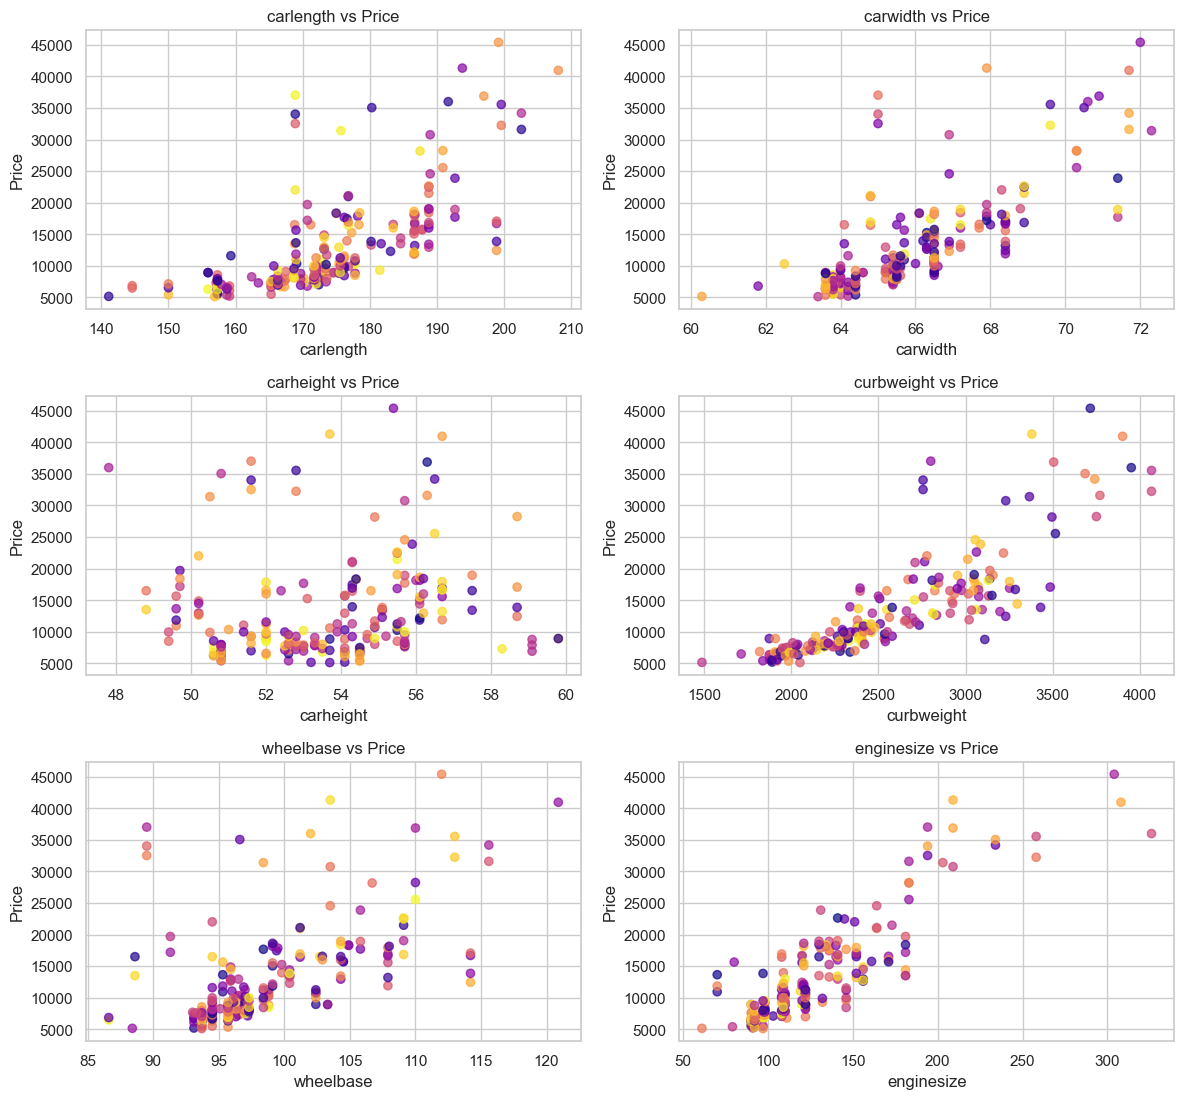

In [55]:
def scatter(x, fig):
    colors = np.random.rand(cars.shape[0])
    plt.subplot(5, 2, fig)
    plt.scatter(cars[x], cars['price'], c=colors, alpha=0.7, cmap='plasma')
    plt.title(x + ' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(12, 18))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
scatter('wheelbase', 5)
scatter('enginesize', 6)

plt.tight_layout()
plt.show()


In [73]:
significant_variables = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber',
                           'drivewheel', 'curbweight', 'carlength', 'carwidth', 'enginesize',
                           'boreratio', 'horsepower', 'wheelbase', 'price']
ds = df[significant_variables].copy()
ds.head()

,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price
0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,13495.0
1,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,16500.0
2,ohcv,gas,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5,16500.0
3,ohc,gas,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8,13950.0
4,ohc,gas,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4,17450.0


In [74]:
dummy_columns = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber', 'drivewheel']
ds = pd.get_dummies(ds, columns=dummy_columns, drop_first=True)

ds.head()

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price,enginetype_dohcv,enginetype_l,...,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,2548,168.8,64.1,130,3.47,111,88.6,13495.0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2548,168.8,64.1,130,3.47,111,88.6,16500.0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2823,171.2,65.5,152,2.68,154,94.5,16500.0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2337,176.6,66.2,109,3.19,102,99.8,13950.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2824,176.6,66.4,136,3.19,115,99.4,17450.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
ds.shape

(205, 28)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = ds.drop('price', axis=1)
y = ds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 0.28128677,  0.07244984,  0.08381686,  0.18801047,  0.4058361 ,
        -0.81538553,  1.03708546, -0.07832604, -0.26813322,  0.64326752,
        -0.26813322, -0.2548236 , -0.13650473, -3.15171911, -0.17733173,
        -0.7200823 ,  1.05003052, -0.36198685, -0.46348119, -0.19487094,
         0.51140831, -0.372678  ,  0.        , -0.07832604, -0.13650473,
        -1.17337615,  1.26616531],
       [ 1.01604452,  1.04391556,  1.17026768, -0.15899277,  0.51738434,
        -0.24189416,  1.54123134, -0.07832604,  3.72948936, -1.55456318,
        -0.26813322, -0.2548236 , -0.13650473,  0.31728716, -0.17733173,
        -0.7200823 ,  1.05003052, -0.36198685, -0.46348119, -0.19487094,
         0.51140831, -0.372678  ,  0.        , -0.07832604, -0.13650473,
        -1.17337615,  1.26616531],
       [-0.54164191, -0.36761583, -1.09710795, -0.85299925, -1.00710835,
        -1.0647296 , -0.50896191, -0.07832604, -0.26813322,  0.64326752,
        -0.26813322, -0.2548236 , -0.13650473,  0.3172

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

In [79]:
y_pred = model.predict(X_test_scaled)

In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 10209920.152417792
R-squared (R2): 0.8706688608123748


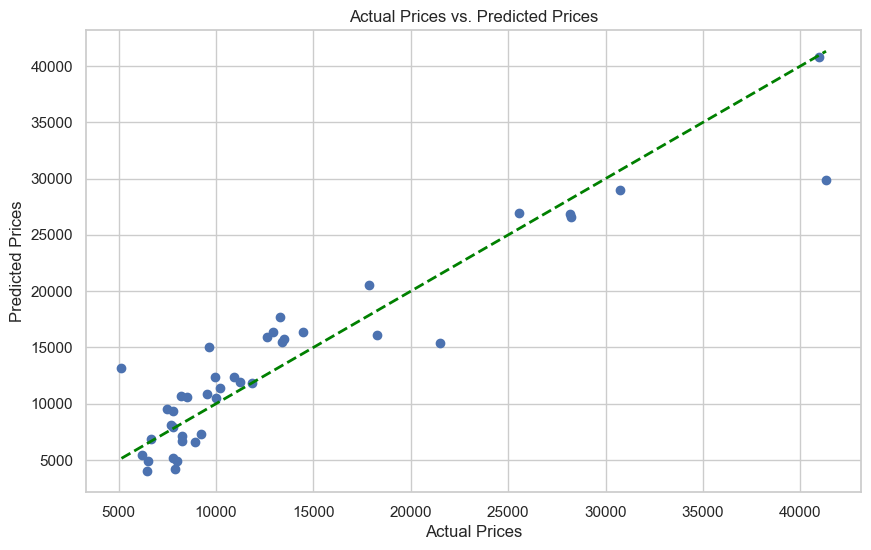

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', linewidth=2) 
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()